<a href="https://colab.research.google.com/github/yunju-1118/ESAA/blob/OB/ESAA_OB_week01_1_ModelTraining(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **모델 훈련**

## **5) 규제가 있는 선형 모델**

과대적합을 감소시키는 좋은 방법은 모델을 규제하는 것이다.
선형 회귀 모델에서는 보통 모델의 가중치를 제한함으로써 규제를 가한다.

### **5.1) 릿지 회귀**
릿지 회귀는 규제가 추가된 선형 회귀 버전이다. 규제항 $\alpha\sum\theta_i^2$ 이 비용함수에 추가된다. 이는 학습 알고리즘을 데이터에 맞추는 것뿐만 아니라 모델의 가중치가 가능한 한 작게 유지되도록 노력한다. 규제항은 훈련하는 동안에만 추가되며, 모델의 훈련이 끝나면 모델의 성능을 규제가 없는 성능 지표로 평가한다.

하이퍼파라미터 $\alpha$는 모델을 얼마나 규제할지 조절한다.

- 릿지 회귀의 비용 함수

  $J(\theta) = MSE(\theta)+\alpha \frac{1}{2} \sum\theta_i^2$

편향 $\theta_0$는 규제되지 않는다. $w$를 특성의 가중치 벡터라고 정의하면 규제항은 $\frac{1}{2}(||w||_2)^2$와 같다.

선형 회귀와 마찬가지로 릿지 회귀를 계산하기 위해 정규방정식을 사용할 수도 있고 경사하강법을 사용할 수도 있다.
- 릿지 회귀의 정규방정식

  $\hat{\theta} = (X^TX+\alpha A)^{-1} X^Ty$

다음은 사이킷런에서 정규방정식을 사용한 릿지 회귀를 적용하는 예이다.

In [2]:
import numpy as np

In [3]:
m = 100
X = 6*np.random.randn(m,1) - 3
y = 0.5*X**2 + X + 2 +np.random.randn(m,1)

In [4]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([13.44438003])

다음은 확률적 경사하강법을 사용한 예시이다.

In [5]:
from sklearn.linear_model import SGDRegressor

In [6]:
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

array([11.91990875])

penalty 매개변수는 사용할 규제를 지정한다. "l2"는 SGD가 비용 함수에 가중치 벡터의 $l_2$ 노름의 제곱을 2로 나눈 규제항을 추가하게 만든다. 즉, 릿지회귀와 같다.

### **5.2) 라쏘 회귀**
**라쏘 회귀**는 선형 회귀의 또 다른 규제된 버전이다. 릿지 회귀처럼 비용 함수에 규제항을 더하지만 $l_2$ 노름의 제곱을 2로 나눈 것 대신 가중치 벡터의 $l_1$ 노름을 사용한다.

- 라쏘 회귀의 비용 함수

  $J(\theta) = MSE(\theta)+\alpha \sum |\theta_i|$

라쏘 회귀의 중요한 특징은 덜 중요한 특성의 가중치를 제거하려고 한다는 것이다. 다시 말해 라쏘 회귀는 자동으로 특성 선택을 하고 **희소 모델**을 만든다.

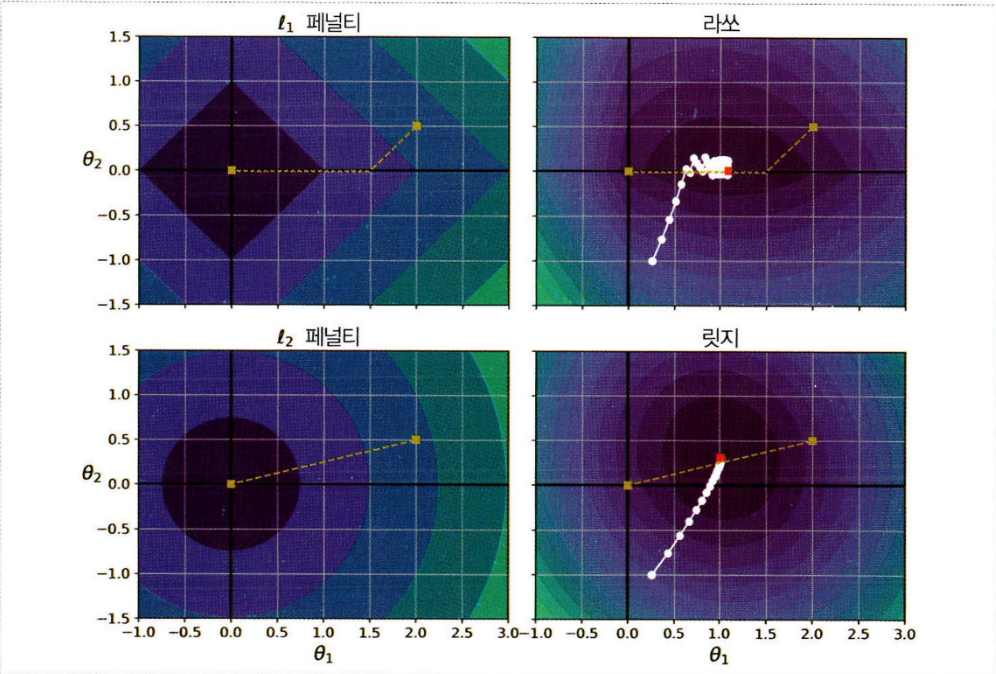

릿지가 라쏘와 다른 점은 크게 두 가지이다. 첫째 파라미터가 전역 최적점에 가까워질수록 gradient가 작아진다. 따라서, 경사하강법이 자동으로 느려지고 수렴에 도움이 된다. 둘째 $\alpha$를 증가시킬수록 최적의 파라미터가 원점에 더 가까워진다. 하지만 완전히 0이 되지는 않는다.

다음은 Lasso 클래스를 사용한 간단한 사이킷런 예제이다.

In [7]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([13.45846033])

Lasso 대신
```
SGDRegressor(penalty="l1")
```
을 사용할 수도 있다.

### **5.3) 엘라스틱넷**
**엘라스틱넷**은 릿지 회귀와 라쏘 회귀를 절충한 모델이다. 규제항은 릿지와 회귀의 규제항을 단순히 더해 사용하며, 혼합 정도는 혼합 비율 $r$을 사용해 조절한다. $r=0$이면 엘라스틱넷은 릿지 회귀와 같고, $r=1$이면 라쏘 회귀와 같다.

- 엘라스틱넷 비용 함수

  $J(\theta) = MSE(\theta)+r\alpha\sum|\theta_i|+\frac{1-r}{2}\alpha\sum\theta_i^2$

릿지가 기본이 되지만 쓰이는 특성이 몇 개뿐이라고 의심되면 라쏘나 엘라스틱넷이 낫다. 이 모델들은 불필요한 특싱의 가중치를 0으로 만들어 준다. 특성 수가 훈련 샘플 수보다 많거나 특성 몇 개가 강하게 연관되어 있을 때는 보통 라쏘보다는 엘라스틱넷을 선호한다.

다음은 사이킷런의 ElasticNet을 사용한 간단한 예제이다.

In [8]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([13.4589567])

### **5.4) 조기 종료**
경사 하강법과 같은 반복적인 학습 알고리즘을 규제하는 색다른 방식은 검증 에러가 최솟값에 도달하면 바로 훈련을 중지시키는 것이다. 이를 **조기 종료(early stopping)** 라고 한다. 조기 조욜는 검증 에러가 최소에 도달하는 즉시 훈련을 멈추는 것이다. 다음은 조기 종료를 위한 기본적인 구현 코드이다.

In [10]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [13]:
from sklearn.base import clone

# 데이터 준비
poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
    ("std_scaler", StandardScaler())
])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=None, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005)

minimum_val_error = float("inf")
best_epoch=None
best_model=None
for epoch in range(1000):
  sgd_reg.fit(X_train_poly_scaled, y_train.ravel())
  y_val_predict = sgd_reg.predict(X_val_poly_scaled)
  val_error = mean_squared_error(y_val, y_val_predict)
  if val_error < minimum_val_error:
    minimum_val_error = val_error
    best_epoch = epoch
    best_model = clone(sgd_reg)

warm_start=True로 지정하면 fit( ) 메서드가 호출될 때 처음부터 다시 시작하지 않고 이전 모델 파라미터에서 훈련을 이어간다.

## **6) 로지스틱 회귀**
로지스틱 회귀는 샘플이 특정 클래스에 속할 확률을 추정하는 데 널리 사용된다.

### **6.1) 확률 추정**
로지스틱 회귀는 선형 회귀 모델과 같이 입력 특성의 가중치 합을 계산한다. 대신 선형 회귀처럼 바로 결과를 출력하지 않고 결괏값의 **로지스틱**을 출력한다.

- 로지스틱 회귀 모델의 확률 추정

  $\hat{p} = h_\theta(x) = σ(\theta^Tx)$

- 로지스틱 함수
  
  $σ(t) = \frac{1}{1+exp(-t)}$

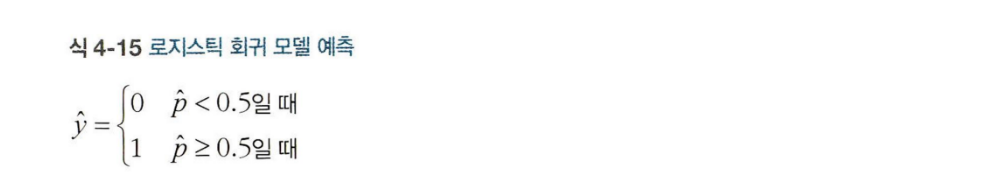

### **6.2) 훈련과 비용 함수**
훈련의 목적은 양성 샘플($y=1$)에 대해서는 높은 확률을 추정하고 음성 샘플($y=0$)에 대해서는 낮은 확률을 추정하는 모델의 파라미터 벡터 $\theta$를 찾는 것이다.

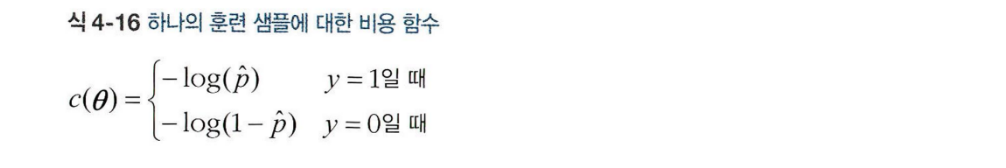

이 비용 함수는 $t$가 0에 가까워지면 $-log(t)$가 매우 커지므로 타당하다 할 수 있다. 반면에 $t$가 1에 가까우면 $-log(t)$는 0에 가까워진다.

전체 훈련 세트에 대한 비용 함수는 모든 훈련 샘플의 비용을 평균한 것이다. 이를 로그 손실이라 부른다.

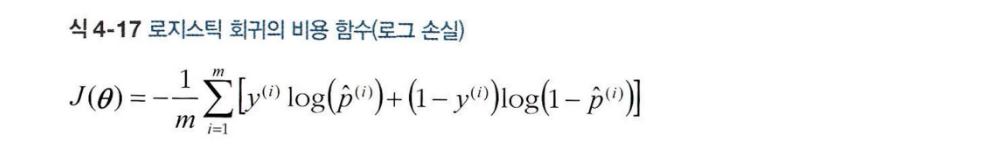

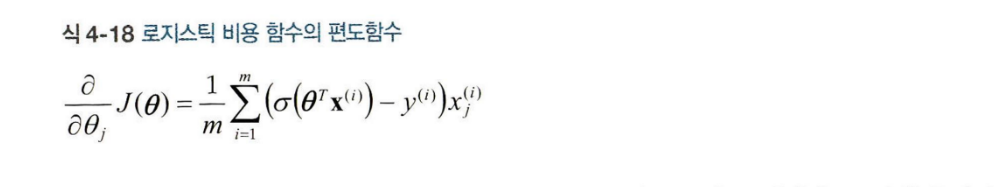

### **6.3) 결정 경계**
꽃잎의 너비를 기반으로 Iris-Versicolor 종을 감지하는 분류기를 만들어보자.

In [15]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())
X = iris['data'][:,3:] # 꽃잎 너비
y = (iris['target']==2).astype(int) # 1 Iris-Virginica면 1, 아니면 0

In [16]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression()

In [20]:
import matplotlib.pyplot as plt

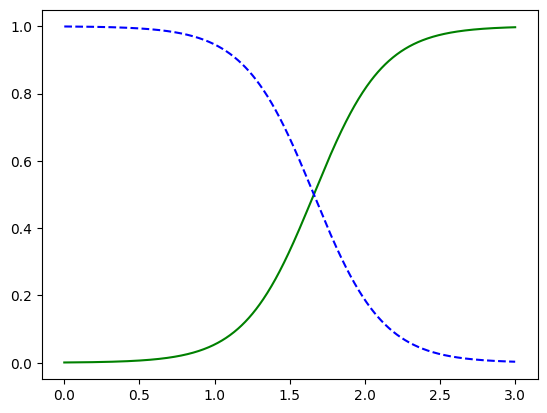

In [21]:
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:,1], "g-", label="Iris virginica")
plt.plot(X_new, y_proba[:,0], "b--", label="Not Iris virginica")

Iris-Verginica의 꽃잎 너비는 1.4 ~ 2.5cm에 분포한다. 반면 다른 붓꽃은 일반적으로 꽃잎 너비가 더 작아 0.1 ~ 0.8cm에 분포한다. 꽃잎 너비가 2cm 이상인 꽃은 분류기가 Iris-Verginica라고 강하게 확신한다. 반면 1cm 아래면 Iris-Verginica가 아니라고 강하게 확신한다. 따라서, 양쪽의 확률이 똑같이 50%가 되는 1.6cm 근방에서 결정 경계가 만들어진다.

In [22]:
log_reg.predict([[1.7],[1.5]])

array([1, 0])

다른 선형 모델처럼 로지스틱 회귀 모델도 $l_1, l_2$ 페널티를 사용하여 규제할 수 있다. 사이킷런은 $l_2$ 페널티를 기본으로 한다.

### **6.4) 소프트맥스 회귀**
로지스틱 회귀 모델은 여러 개의 이진 분류기를 훈련시켜 연결하지 않고 직접 다중 클래스를 지원하도록 일반화될 수 있다. 이를 **소프트맥스 회귀** 또는 **다항 로지스틱 회귀**라고 한다.

샘플 $x$가 주어지면 먼저 소프트맥스 회귀 모델이 각 클래스 $k$에 대한 점수 $s_k(x)$를 계산하고, 그 점수에 **소프트맥스 함수**를 적용하여 각 클래스의 확률을 추정한다.

- 클래스 $k$에 대한 소프트맥스 점수

  $s_k(x) = (\theta^{(k)})^Tx$

각 클래스는 자신만의 파라미터 벡터 $\theta^{(k)}$가 있다. 이 벡터들은 **파라미터 행렬**에 행으로 저장된다.

샘플 $x$에 대해 각 클래스의 점수가 계산되면 소프트맥스 함수를 통과시켜 클래스 $k$에 속할 확률을 추정할 수 있다. 이 함수는 각 점수에 지수 함수를 적용한 후, 정규화한다. 일반적으로 이 점수를 로짓 또는 로그-오즈라고 부른다.

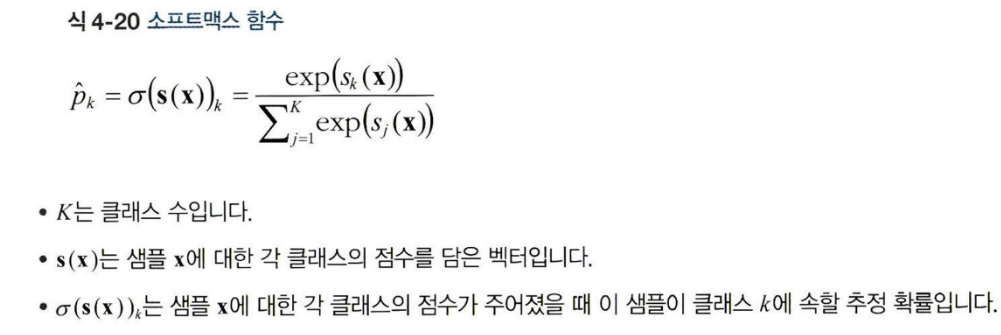

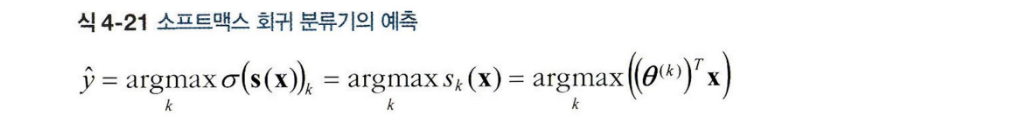

모델이 타깃 클래스에 대해서는 높은 확률을 추정하도록 만드는 것이 목적이다. **크로스 엔트로피** 비용 함수를 최소화하는 것은 타깃 클래스에 대해 낮은 확률을 예측하는 모델을 억제하므로 이 목적에 부합한다. 크로스 엔트로피는 추정된 클래스의 확률이 타깃 클래스에 얼마나 잘 맞는지 측정하는 용도로 종종 사용된다.

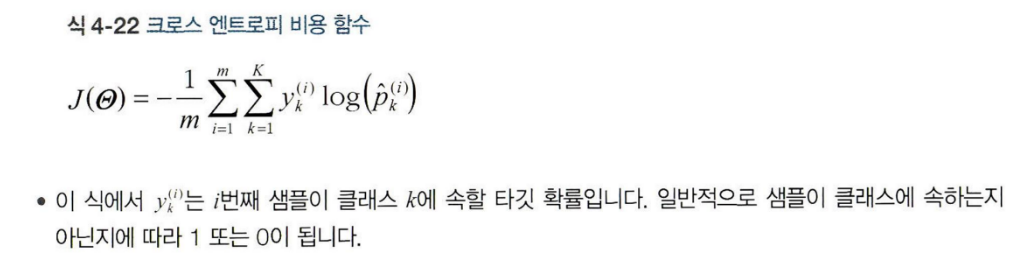

소프트맥스 회귀를 사용해 붓꽃을 세 개의 클래스로 분류해보자. 사이킷런의 Logistic Regression은 클래스가 둘 이상일 때 기본적으로 일대다 전략을 사용한다. 하지만, multi_class 매개변수를 "multinomial"로 바꾸면 소프트맥스 회귀를 사용할 수 있다. 소프트맥스 회귀를 사용하려면 solver 매개 변수에 "lbfgs"와 같이 소프트맥스 회귀를 지원하는 알고리즘을 지정해야 한다.

In [24]:
X = iris["data"][:,(2,3)]
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X,y)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(C=10, multi_class='multinomial')

In [25]:
softmax_reg.predict([[5,2]]), softmax_reg.predict_proba([[5,2]])

(array([2]), array([[6.21626374e-07, 5.73689802e-02, 9.42630398e-01]]))